In [1]:
#load class
import numpy as np
import pandas as pd # in case it's not installed then install using conda create -c conda-forge -n name_of_my_env python pandas
# more installations information can be found: https://pandas.pydata.org/docs/getting_started/install.html

import os
import pickle

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#load sklearn module for creating and evaluating ML models. In case sklearn isn't installed,
#follow this link https://scikit-learn.org/stable/install.html for further details on the installation process.

from sklearn.preprocessing import StandardScaler #module for perform scaling


In [2]:
from sklearn.model_selection import train_test_split #module for splitting datatset
from sklearn import metrics #module for evaluating performanc

In [3]:
#load your data
df = pd.read_csv("data.csv") #change the name accordingly
df.head() # prints top 5 rows from the datatset to check data is load or not

,Temp,Humd,Label
0,21.0,38.0,1
1,21.0,38.0,1
2,21.0,38.0,1
3,21.0,38.0,1
4,21.0,38.0,1


In [4]:
df.describe()

,Temp,Humd,Label
count,1076.000000,1076.000000,1076.000000
mean,28.011152,58.989777,0.930297
std,14.721156,35.642108,0.254764
min,21.000000,32.000000,0.000000
25%,24.000000,41.000000,1.000000
50%,25.000000,51.000000,1.000000
75%,27.000000,65.000000,1.000000
max,366.000000,901.000000,1.000000


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Temp     0
Humd     0
Label    0
dtype: int64


In [6]:
# remove duplicatesd
df = df.drop_duplicates()

In [7]:
df.describe()

,Temp,Humd,Label
count,244.000000,244.000000,244.000000
mean,36.848361,78.397541,0.696721
std,28.747903,65.074647,0.460619
min,21.000000,32.000000,0.000000
25%,24.000000,51.000000,0.000000
50%,27.000000,62.000000,1.000000
75%,35.250000,81.000000,1.000000
max,366.000000,901.000000,1.000000


In [8]:
# prepare features
x = df.drop(['Label'],axis=1) #remove class or label
y = df['Label'] #load label

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2) #split datatset. Here ratio is 80:20. Change accordingly

In [10]:
# Scale the data using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scale training set
x_test = scaler.transform(x_test) #scale test set

Accuracy: 0.9795918367346939
Balanced Accuracy: 0.9583333333333333
Precision: 0.9736842105263158
F1: 0.9866666666666666


Text(113.9222222222222, 0.5, 'True Value')

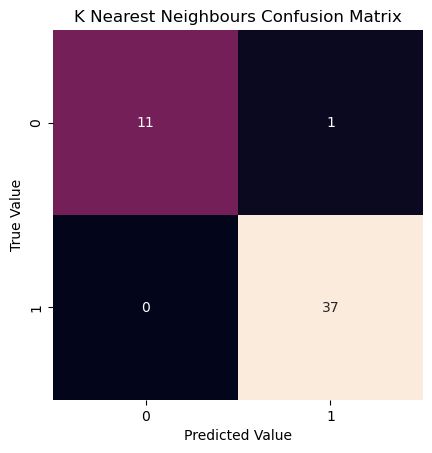

In [11]:
# K nearest neighbours classifier
from sklearn.neighbors import KNeighborsClassifier #load your classifier. In this code, I have used KNN. You can choose other algorithms. You have to use at least 3 to complete this.

z = KNeighborsClassifier(n_neighbors=3) # KNN classifier for 3 neighbours
KNN = z.fit(x_train,y_train) # start training
predict = KNN.predict(x_test) # performance in the test set

print("Accuracy:", metrics.accuracy_score(y_test,predict)) # evaluating the performance based on accuracy
print("Balanced Accuracy:", metrics.balanced_accuracy_score(y_test,predict))
print("Precision:", metrics.precision_score(y_test,predict))
print("F1:", metrics.f1_score(y_test,predict))

filename = 'knn.pickle'
pickle.dump(z, open(filename, "wb"))

# confusion matrix
mat = confusion_matrix(y_test,predict)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.title('K Nearest Neighbours Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

Accuracy: 0.9795918367346939
Balanced Accuracy: 0.9864864864864865
Precision: 1.0
F1: 0.9863013698630138


Text(113.9222222222222, 0.5, 'True Value')

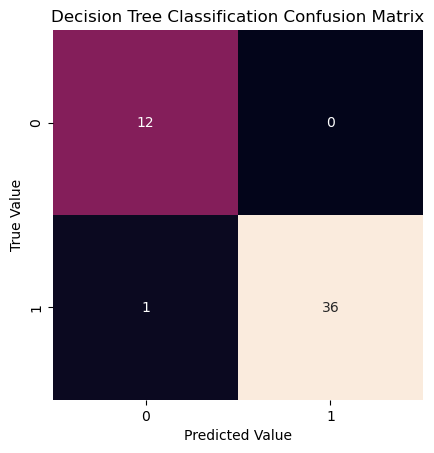

In [12]:
# Decision Tree Classification
from sklearn import tree

z = tree.DecisionTreeClassifier() 
KNN = z.fit(x_train,y_train) # start training
predict = KNN.predict(x_test) # performance in the test set

print("Accuracy:", metrics.accuracy_score(y_test,predict)) # evaluating the performance based on accuracy
print("Balanced Accuracy:", metrics.balanced_accuracy_score(y_test,predict))
print("Precision:", metrics.precision_score(y_test,predict))
print("F1:", metrics.f1_score(y_test,predict))

filename = 'TreeClassifier.pickle'
pickle.dump(z, open(filename, "wb"))

# confusion matrix
mat = confusion_matrix(y_test,predict)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

Accuracy: 0.9387755102040817
Balanced Accuracy: 0.875
Precision: 0.925
F1: 0.961038961038961


Text(113.9222222222222, 0.5, 'True Value')

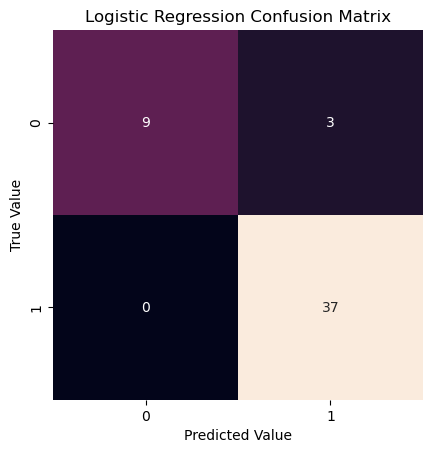

In [13]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

z = LogisticRegression() 
KNN = z.fit(x_train,y_train) # start training
predict = KNN.predict(x_test) # performance in the test set

print("Accuracy:", metrics.accuracy_score(y_test,predict)) # evaluating the performance based on accuracy
print("Balanced Accuracy:", metrics.balanced_accuracy_score(y_test,predict))
print("Precision:", metrics.precision_score(y_test,predict))
print("F1:", metrics.f1_score(y_test,predict))

filename = 'LogisticRegression.pickle'
pickle.dump(z, open(filename, "wb"))

# confusion matrix
mat = confusion_matrix(y_test,predict)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

Accuracy: 0.9795918367346939
Balanced Accuracy: 0.9583333333333333
Precision: 0.9736842105263158
F1: 0.9866666666666666


Text(113.9222222222222, 0.5, 'True Value')

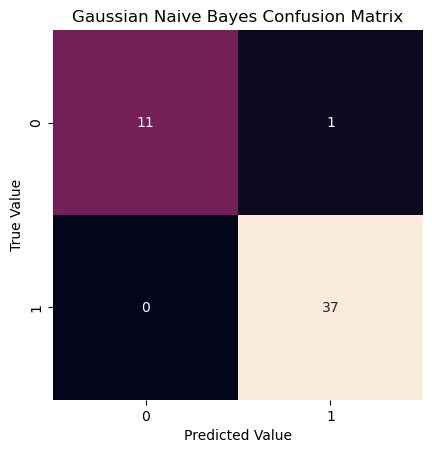

In [14]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

z = GaussianNB() 
KNN = z.fit(x_train,y_train) # start training
predict = KNN.predict(x_test) # performance in the test set

print("Accuracy:", metrics.accuracy_score(y_test,predict)) # evaluating the performance based on accuracy
print("Balanced Accuracy:", metrics.balanced_accuracy_score(y_test,predict))
print("Precision:", metrics.precision_score(y_test,predict))
print("F1:", metrics.f1_score(y_test,predict))

filename = 'GaussianNB.pickle'
pickle.dump(z, open(filename, "wb"))

# confusion matrix
mat = confusion_matrix(y_test,predict)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

Accuracy: 0.9591836734693877
Balanced Accuracy: 0.9166666666666667
Precision: 0.9487179487179487
F1: 0.9736842105263158


C:\Users\willi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Text(113.9222222222222, 0.5, 'True Value')

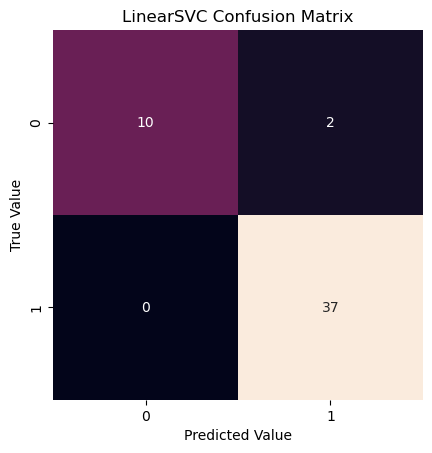

In [15]:
# LinearSVC
from sklearn.svm import LinearSVC

z = LinearSVC() 
KNN = z.fit(x_train,y_train) # start training
predict = KNN.predict(x_test) # performance in the test set

print("Accuracy:", metrics.accuracy_score(y_test,predict)) # evaluating the performance based on accuracy
print("Balanced Accuracy:", metrics.balanced_accuracy_score(y_test,predict))
print("Precision:", metrics.precision_score(y_test,predict))
print("F1:", metrics.f1_score(y_test,predict))

filename = 'LinearSVC.pickle'
pickle.dump(z, open(filename, "wb"))

# confusion matrix
mat = confusion_matrix(y_test,predict)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.title('LinearSVC Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')